# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [27]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf

%matplotlib inline

In [28]:
dataset = get_dataset("./data/train/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['./data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86


In [29]:
dataset

<DatasetV1Adapter shapes: {image: (None, None, 3), source_id: (), key: (), filename: (), groundtruth_image_confidences: (None,), groundtruth_verified_neg_classes: (None,), groundtruth_not_exhaustive_classes: (None,), groundtruth_boxes: (None, 4), groundtruth_area: (None,), groundtruth_is_crowd: (None,), groundtruth_difficult: (None,), groundtruth_group_of: (None,), groundtruth_weights: (None,), groundtruth_classes: (None,), groundtruth_image_classes: (None,), original_image_spatial_shape: (2,)}, types: {image: tf.uint8, source_id: tf.string, key: tf.string, filename: tf.string, groundtruth_image_confidences: tf.float32, groundtruth_verified_neg_classes: tf.int64, groundtruth_not_exhaustive_classes: tf.int64, groundtruth_boxes: tf.float32, groundtruth_area: tf.float32, groundtruth_is_crowd: tf.bool, groundtruth_difficult: tf.int64, groundtruth_group_of: tf.bool, groundtruth_weights: tf.float32, groundtruth_classes: tf.int64, groundtruth_image_classes: tf.int64, original_image_spatial_sh

In [30]:
for batch in dataset.take(1):
    image = batch['image'].numpy()
    h = image.shape[0]
    w = image.shape[1]
    c = image.shape[2]
    print(h, w, c)

640 640 3


In [31]:
for batch in dataset.take(1):
    box = batch['groundtruth_boxes'].numpy()
    print(box[1])

[0.54449964 0.7661318  0.6949957  0.9957411 ]


In [32]:
for batch in dataset.take(1):
    box = batch['groundtruth_boxes'].numpy()
    y1 = box[0]
    x1 = box[1]
    y2 = box[2]
    x2 = box[3]
    print(x1, y1, x2, y2)

IndexError: index 3 is out of bounds for axis 0 with size 3

In [ ]:
import numpy as np
np.dot((x2 - x1), w)

In [ ]:
patches?

## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [ ]:
def display_images(batch):
    
    # Prepare the plot area
    f, ax = plt.subplots(figsize = (10, 10))
    
    # Extract Image to work on
    img = batch['image'].numpy()
    ax.imshow(img)
    
    # Extract the Bounding Box
    boxes = batch['groundtruth_boxes'].numpy()
    
    # Extract Labels
    labels = batch['groundtruth_classes'].numpy()
    
    # Dimension of the image
    h = img.shape[0]
    w = img.shape[1]
    c = img.shape[2]
    
    # Define color map of the targets
    color_map = {1: 'red', 2: 'blue', 4: 'green'}
    
    #
    for box, label in zip(boxes, labels):
        y1 = box[0]
        x1 = box[1]
        y2 = box[2]
        x2 = box[3]
        # Rectangle(XY, width, height, angle, **kwargs)
        
        # Define Anchor point
        x = np.dot(x1, w)
        y = np.dot(y1, h)
        
        Anchor_point = (x, y)
        
        # Define width
        width = np.dot((x2 - x1), w)
        
        #Degine height
        height = np.dot((y2 - y1), w)
        
        
        rectangle = patches.Rectangle(Anchor_point, width, height, 
                                      edgecolor = color_map[label], facecolor = 'none') 
        
        ax.add_patch(rectangle)
        


## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

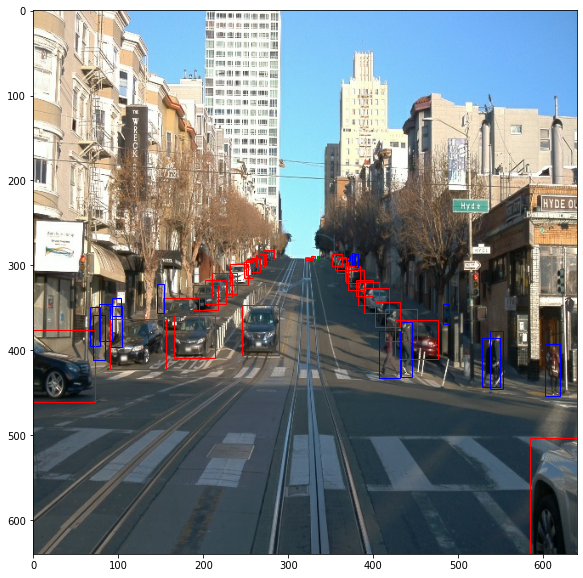

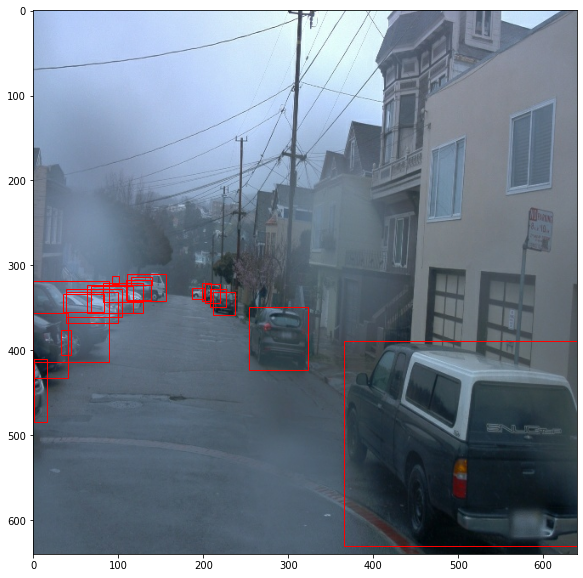

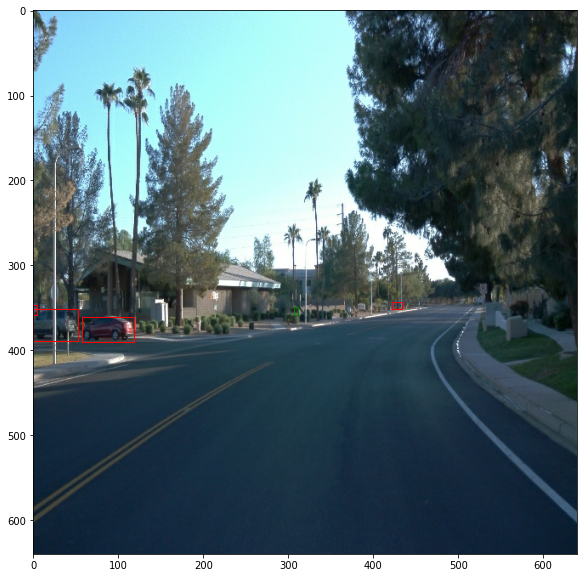

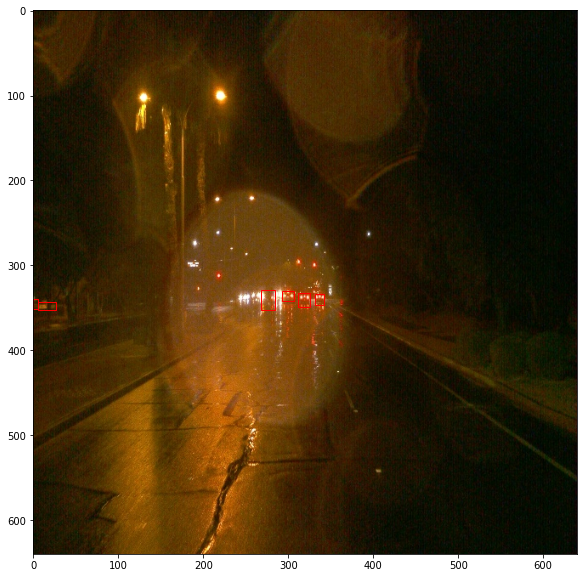

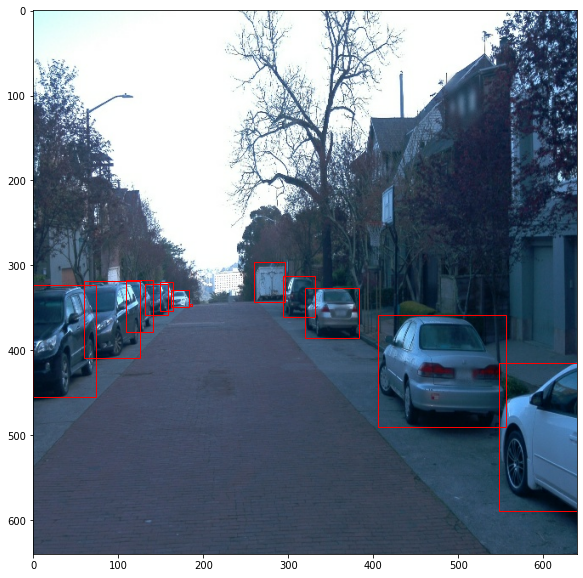

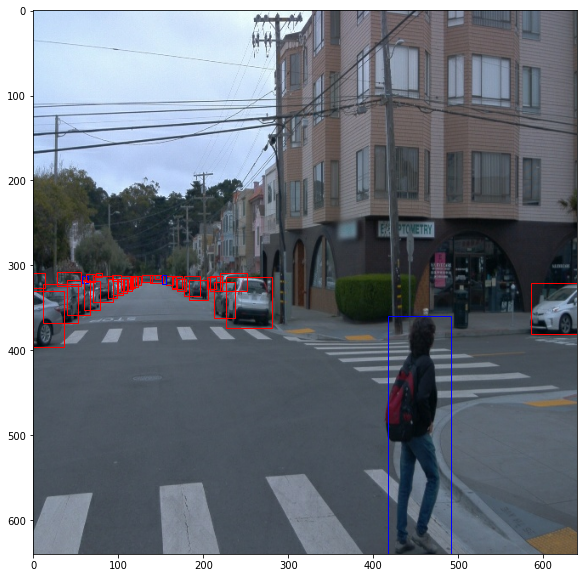

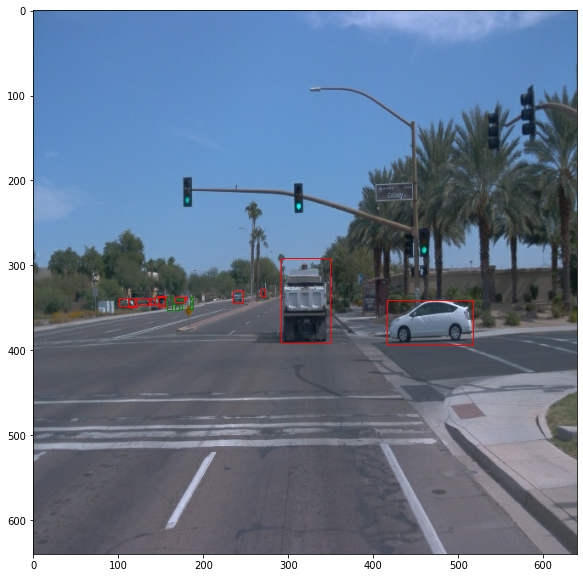

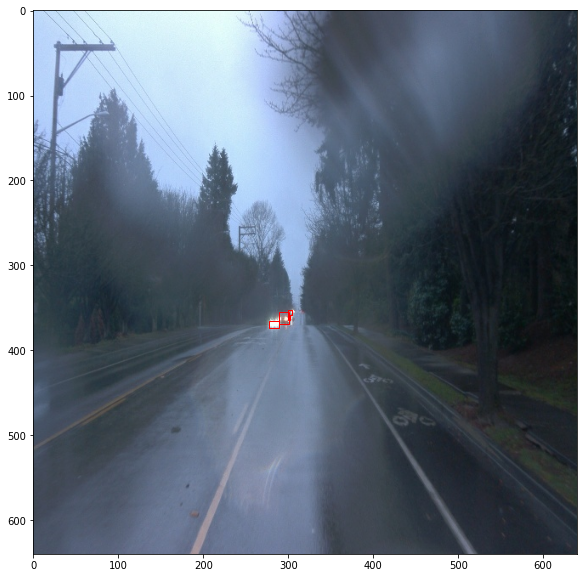

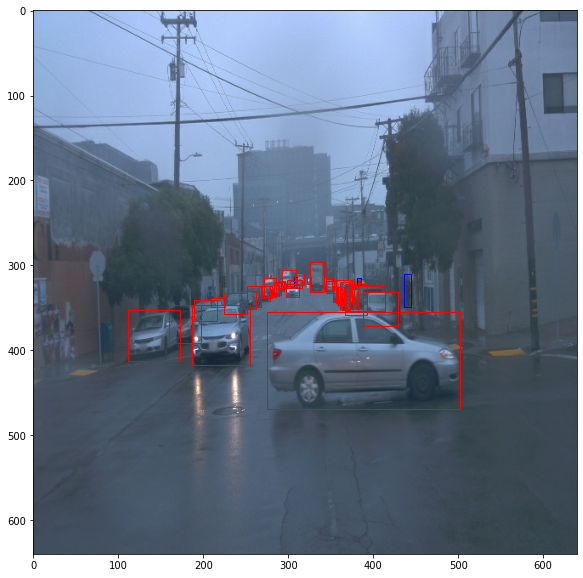

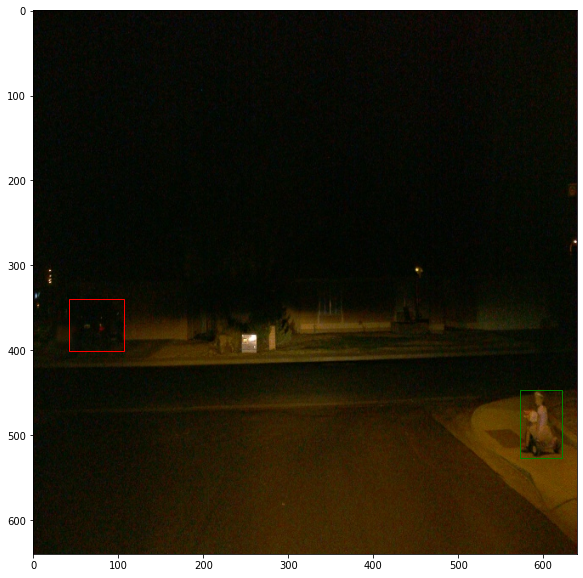

In [33]:
# Display 10 random images in dataset
dataset = dataset.take(10)

for batch in dataset:
    display_images(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [43]:
Class_count = {1: 0, 2: 0, 4:0}

for batch in dataset.take(15000):
    for classes in batch['groundtruth_classes'].numpy():
        Class_count[classes] += 1
        
label_map = {'Vehicles': Class_count[1], 'Pedestrians': Class_count[2], 'Cyclists': Class_count[4]}
print(label_map)

{'Vehicles': 190, 'Pedestrians': 29, 'Cyclists': 2}


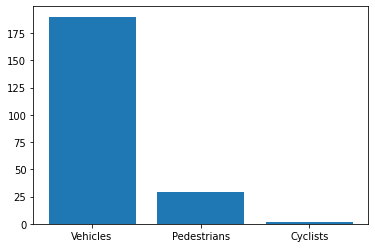

In [44]:
plt.bar(*zip(*label_map.items()))
plt.show()